# Ashwin Ramesh

## Research question/interests

I would like to research the effects of stock splits on the top tech stocks between 2010 and 2016. Namely Apple, Microsoft, Facebook and Google stock. I would like to analyze how the trading volume was affected by the split and if there was a directional bias associated with the stock split (If it was a positive or negative bias).

In [1]:
import pandas as pd
import numpy as np
import plotly as go
import matplotlib.pylab as plt
import seaborn as sns 

fundamentals_Df = pd.read_csv('../data/raw/fundamentals.csv')
pricesplit_Df = pd.read_csv('../data/raw/prices-split-adjusted.csv')
prices_Df = pd.read_csv('../data/raw/prices.csv')
securities_Df = pd.read_csv('../data/raw/securities.csv')




In [2]:
pricesplit_Df.shape

(851264, 7)

In [3]:
pricesplit_Df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


I noticed that the data is not ordered by date. This would make analysis difficult and hence it must be corrected as shown below. 

In [4]:
sorted_pricesplit=pricesplit_Df.sort_values(by = ["date"], ascending = True)
sorted_pricesplit.to_csv('sorted_pricesplit.csv', index =False)

In [5]:
sorted_pricesplit.nunique(axis=0)

date        1762
symbol       501
open       97522
close      98520
low        97470
high       97784
volume    171073
dtype: int64

In [6]:
sorted_pricesplit.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5415112.640027
std,75.203893,75.201216,74.459518,75.906861,12494681.433081
min,1.660000,1.590000,1.500000,1.810000,0.000000
25%,31.270000,31.292776,30.940001,31.620001,1221500.000000
50%,48.459999,48.480000,47.970001,48.959999,2476250.000000
75%,75.120003,75.139999,74.400002,75.849998,5222500.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,859643400.000000


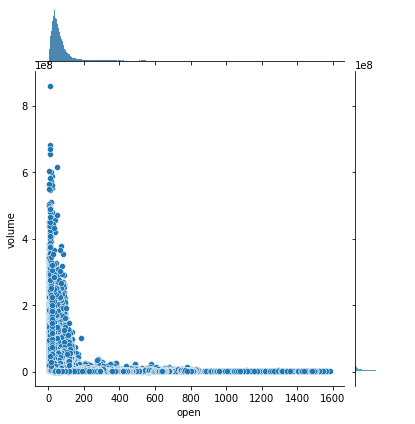

In [7]:
sns.jointplot(x='open',y='volume', data=sorted_pricesplit)


It is noticable through the above joint plot that for a 6 year interval between 2010 and 2016, there is a lot of trading volume for stocks that are in the lower price range as opposed to the higher price range. This refects the general behavior of retail investors as cheaper stocks are easier to invest into with minimal risk. As the prices increase, trading volume decreases significantly even over a long period of time. 

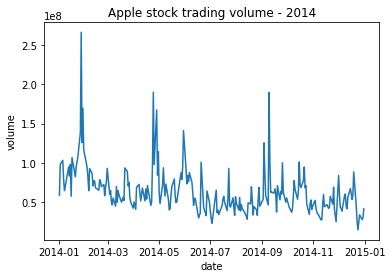

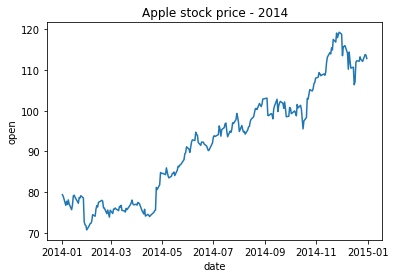

In [8]:
#interested_stocks= ["AAPL", "MSFT"]
sorted_pricesplit['date'] = pd.to_datetime(sorted_pricesplit['date'], format='%Y-%m-%d')

#Apple 2014 stock split

filtered_df = sorted_pricesplit.loc[(sorted_pricesplit['date'] >= '2014-01-01')
                     & (sorted_pricesplit['date'] < '2015-01-01')]

apple_2014 = filtered_df.loc[filtered_df["symbol"]=="AAPL"]
plot1=sns.lineplot(x = "date", y = "volume", data =apple_2014)
plot1.set_title("Apple stock trading volume - 2014")
plt.show() #Shows volume variation based on the day

plot2=sns.lineplot(x = "date", y= "open", data= apple_2014);
plot2.set_title("Apple stock price - 2014")
plt.show() #Shows price variation based on the day

Apple went through a 7:1 basis stock split on June 9th 2014. It can be observed that in the month of June, there was a sharp increase in trading volume which would be expected considering the drop in share price. The share price however begins to rise as well. This could be because large capital invesotrs tend to have greater sway on the market as opposed to the retail investor. 

## Method chaining

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def pre_processing(x):

    filtered_Df = (
    pd.read_csv(x)
    .sort_values(by = ["date"], ascending = True)
    .dropna(axis=0)
    
    )
    return filtered_Df

In [11]:
pre_processing('../data/raw/prices-split-adjusted.csv')

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


## Module Testing

In [12]:
df = p2.load_and_process('../data/raw/prices.csv')

NameError: name 'p2' is not defined